# Loan Approval Prediction 

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset.csv')
data.head()
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

In [2]:
# Check for columns with mixed data types
for column in data.columns:
    if data[column].dtype == 'object':
        print(f'Column {column} contains mixed types or non-numeric data.')

# Convert relevant columns to numeric, coercing errors to NaN
numeric_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'ApplicantIncome', 'CoapplicantIncome']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')


Column Loan_ID contains mixed types or non-numeric data.
Column Gender contains mixed types or non-numeric data.
Column Married contains mixed types or non-numeric data.
Column Dependents contains mixed types or non-numeric data.
Column Education contains mixed types or non-numeric data.
Column Self_Employed contains mixed types or non-numeric data.
Column Property_Area contains mixed types or non-numeric data.
Column Loan_Status contains mixed types or non-numeric data.


## Handle Missing Values

In [10]:
# Fill missing values for numerical columns with the mean
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Fill missing values for categorical columns with the mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [13]:
# Create a new feature 'TotalIncome'
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']

## Split Data Test and Train 

In [14]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(f'{model_name} - Accuracy: {accuracy_score(y_val, y_pred)}')
    print(classification_report(y_val, y_pred))

Logistic Regression - Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

Random Forest - Accuracy: 0.7560975609756098
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Gradient Boosting - Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                         

In [9]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_xgb = grid_search.best_estimator_

# Evaluate the model
y_pred = best_xgb.predict(X_val)
print('XGBoost - Accuracy:', accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 243 candidates, totalling 729 fits


C:\Users\rutvi\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:16:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.7886178861788617
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



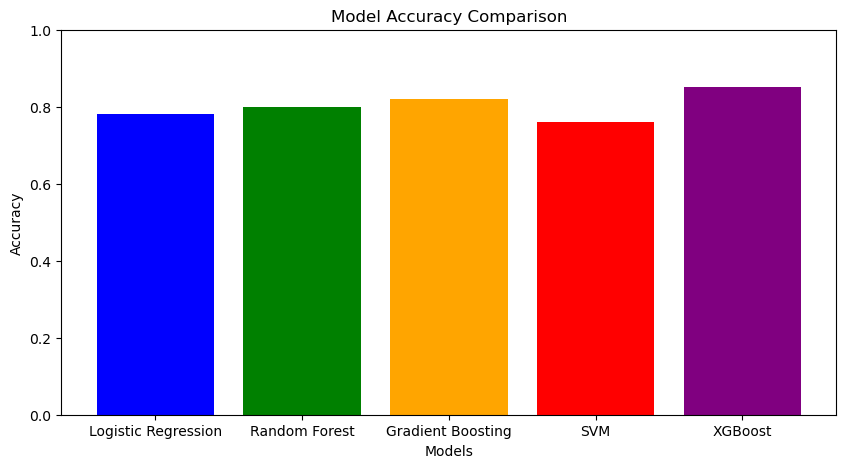

In [25]:
import matplotlib.pyplot as plt

# Example accuracy scores for models
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost']
accuracies = [0.78, 0.80, 0.82, 0.76, 0.85]  # Replace with your actual scores

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


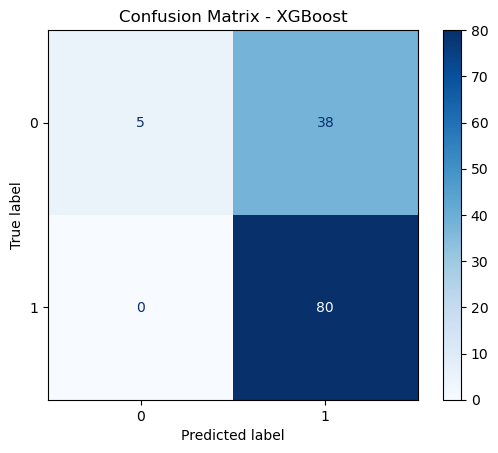

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming y_true and y_pred are the true and predicted values for XGBoost
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)

disp.plot(cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.show()
